# Regressão Logística

A regressão logística é uma técnica de análise de dados com funcionalidades muito importantes voltadas, por exemplo, para a probabilidade e encontrar a relação entre duas variáveis distintas. Ela é muito utilizada em modelos de Machine Learning e Inteligência artificial, de acordo com a AWS, e possui diversos benefícios, como sua simplicidade de implementação, velocidade de processamento, flexibilidade e visibilidade.

Assim, é possível realizar uma análise preditiva a partir do resultado obtido da probabilidade de determinado cenário acontecer.

Vamos supor, por exemplo que somos uma agência de seguros e gostaríamos de saber a probabilidade de uma pessoa sofrer um acidente com base no tempo que ela passou na autoescola. Teríamos um gráfico da seguinte forma:

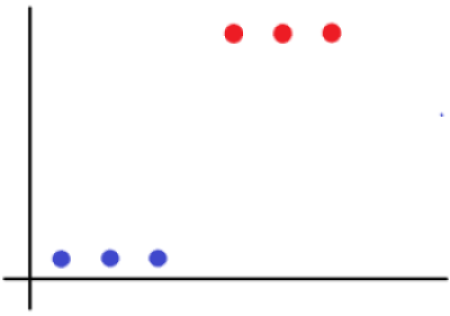

Os círculos vermelhos representam as pessoas que nunca sofreram acidente, enquanto os círculos azuis representam os que já sofreram, enquanto isso, o eixo x representa o número de dias que passaram na autoescola.

Se utilizássemos a regressão linear, ela não iria conseguir definir exatamente a probabilidade por causa da falta de linearidade em relação aos dados e seu limite em relação à variável binária de sofrer acidente. Isso ocorre, porque as pessoas que já sofreram acidente são classificadas em "Sim" ou "Não". Dessa forma, poderíamos representar numericamente esse gráfico da seguinte forma, sendo o eixo y se essas pessoas já sofreram acidente, e o eixo x o número de dias que eles permaneceram na autoescola. 

Assim, a regressão logística geralmente é utilizada para realizar modelos de análise de dados de probabilidade de dados categóricos, muitas vezes binários como nesse exemplo.

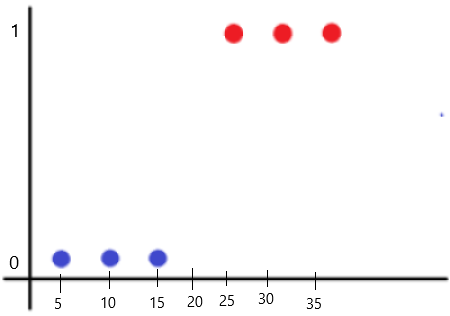

Desse modo, ao utilizar a regressão logística, estaríamos desenhando uma sigmoide para entender a probabilidade de um dos resultados dessa variável binária acontecer, com isso, podemos perceber um gráfico da seguinte maneira:

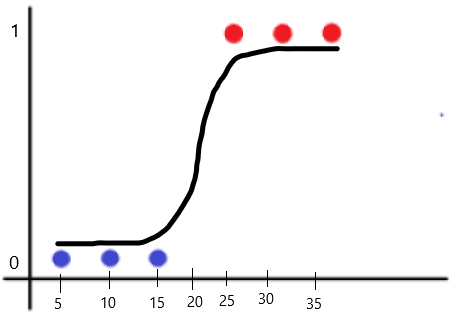

Essa sigmoide apresenta a essa equação:

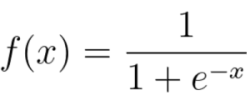

A partir da equação, nota-se que todos os valores para f(x) estão entre 1 e 0, pois, caso x tenha valor igual a infinito, seu limite tenderá a 0, com a equação se igualando a 1/1. Enquanto isso, se seu expoente for igual a menos infinito, seu valor crescerá infinitamente e, consequentemente, tenderá a 0.

Nota-se que, quando os dados apresentados não possuem como resultado exatamente 1 e 0, eles são classificados a partir de sua proximidade, então todo número x que estiver classificado como 0.5 < x, será considerado como 1.

Para calcular essa probabilidade de ser um ou outro, podemos representar pela equação dada a seguir:


\begin{gather*}
P\ ( Y\ =\ 1\ |\ X\ =\ x_{i}) \ =\ p_{i} \ \\
\\
P\ ( Y\ =\ 0\ |\ X\ =\ x_{i}) \ =1-\ p_{i} \ 
\end{gather*}

A primeira equação representa as chances de darem sucesso (1) , enquanto a segunda representa as chances de darem fracasso (0).

Nesse caso não é utilizada a regressão linear, pois ela acaba superando o valor 1 do gráfico, podendo fornecer valores maiores que 1 e menor do que 0, violando o critério de probabilidade, cujos valores precisamo estar entre 0 e 1. Assim, a partir da regressão logística, temos essa condição de pé, além de uma possibilidade de ajuste de acordo com os dados apresentados no conjunto.

Além disso, podemos perceber que a equação da regressão logística apresenta uma certa semelhança com a equação da regressão linear, outra técnica muito utilizada para análise de dados e análise preditiva.

\begin{equation*}
y\ =\ \beta _{0} +\beta _{1} x
\end{equation*}

Essa equação da regressão linear é composta pelos seguintes elementos:


y = variável resposta ou dependente

$\beta_{0}$ = intercepto

$\beta_{1}$ = coeficiente angular

x = variável explicativa ou independente

In [ ]:
Acaba que a regressão linear pode ser representada em forma de matriz a partir da seguinte multiplicação:

In [1]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class LogisticRegression:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            # approximate y with linear combination of weights and x, plus bias
            linear_model = np.dot(X, self.weights) + self.bias
            # apply sigmoid function
            y_predicted = self._sigmoid(linear_model)

            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        
        return np.array(y_predicted_cls)
    
    def plot(self, X, y, legend):
        # only plots if X refers to exactly 2 variables
        if X.shape[1] != 2:
            raise ValueError("Can plot only for X's that refers to exactly 2 vars.")
        
        slope = -(self.weights[0]/self.weights[1])
        intercept = -(self.bias/self.weights[1])
        predictions = self.predict(X)

        sns.set_style('white')
        sns.scatterplot(x = X[:,0], y= X[:,1], hue=y.reshape(-1), style=predictions.reshape(-1));

        ax = plt.gca()
        ax.autoscale(False)
        x_vals = np.array(ax.get_xlim())
        y_vals = intercept + (slope * x_vals)
        plt.plot(x_vals, y_vals, c="k");
        
        plt.xlabel(legend[0])
        plt.ylabel(legend[1])

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

## Importando Base

In [3]:
#importando a base de dados
df = pd.read_csv("CarPrice_Assignment.csv")

In [41]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [42]:
#substituindo gas e diesel por 1 e 0
df2 = df.replace("diesel",0)
df2

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,0,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [43]:
df3 = df2.replace("gas",1)
df3

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,1,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),1,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,1,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,1,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,0,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [53]:
#definindo as variáveis independentes e a variável dependente sendo observada
y = df3["fueltype"]
x = df3.drop(df3.columns, axis=1)

In [54]:
regressao = LogisticRegression(learning_rate=1, n_iters=1000).fit(x, y)

In [55]:
#calculando o y esperado
y_esp = regressao.predict(x.loc[:])

AttributeError: 'NoneType' object has no attribute 'predict'

In [ ]:
#calculando a probabilidade de y
y_prob = regressao.predict_proba(x.loc[:, :])

In [ ]:
#vendo a precisão do algoritmo
regressao.score(x,y)